## 카테고리별 거래 건수와 총매출

                  제품카테고리   거래건수         총매출
0            Accessories    234     7295.88
1                Android     43      711.03
2                Apparel  18126   591145.80
3              Backpacks     89     8772.69
4                   Bags   1882   151314.43
5                Bottles    268     6923.65
6              Drinkware   3483   200707.83
7                    Fun    160     6029.01
8             Gift Cards    159    19533.82
9                 Google    105     9420.47
10              Headgear    771    53471.44
11            Housewares    122     4637.32
12             Lifestyle   3092    74385.70
13             More Bags     46     2946.96
14                  Nest   2198   518193.50
15           Nest-Canada    317    70910.40
16              Nest-USA  14013  2554202.39
17  Notebooks & Journals    749   107085.96
18                Office   6513   276794.40
19                  Waze    554     6311.94


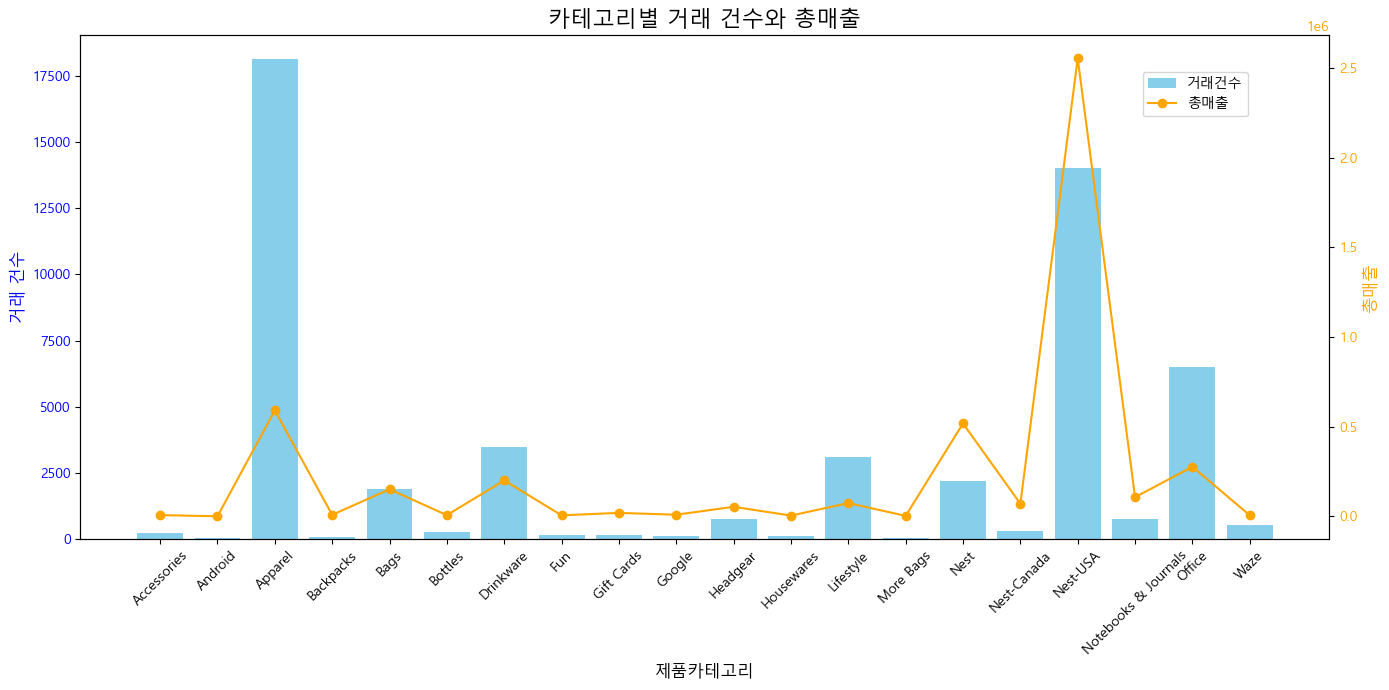

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (예: 'Malgun Gothic' 또는 'AppleGothic' 등 사용 가능)
plt.rc('font', family='Malgun Gothic')  # 윈도우: 'Malgun Gothic', 맥: 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
onlinesales_file_path = r"C:\Users\Jimin\Desktop\project\ecommerce\raw\Onlinesales_info.csv"
onlinesales_data = pd.read_csv(onlinesales_file_path)

# 날짜 데이터 타입 변환
onlinesales_data['거래날짜'] = pd.to_datetime(onlinesales_data['거래날짜'])

# 총 매출 계산 (총 매출 = 수량 * 평균 구매 금액)
onlinesales_data['총매출'] = onlinesales_data['수량'] * onlinesales_data['평균금액']

# 카테고리별 거래 건수와 총매출 집계
category_summary = onlinesales_data.groupby('제품카테고리').agg(
    거래건수=('거래ID', 'count'),
    총매출=('총매출', 'sum')
).reset_index()

# 결과 출력
print(category_summary)

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

# 거래 건수 막대 그래프
ax1.bar(category_summary['제품카테고리'], category_summary['거래건수'], color='skyblue', label='거래건수')
ax1.set_xlabel('제품카테고리', fontsize=12)
ax1.set_ylabel('거래 건수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('카테고리별 거래 건수와 총매출', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

# 총매출 선 그래프 (2번째 y축)
ax2 = ax1.twinx()
ax2.plot(category_summary['제품카테고리'], category_summary['총매출'], color='orange', marker='o', label='총매출')
ax2.set_ylabel('총매출', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 범례 추가
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.tight_layout()
plt.show()


## 쿠폰 사용 비율

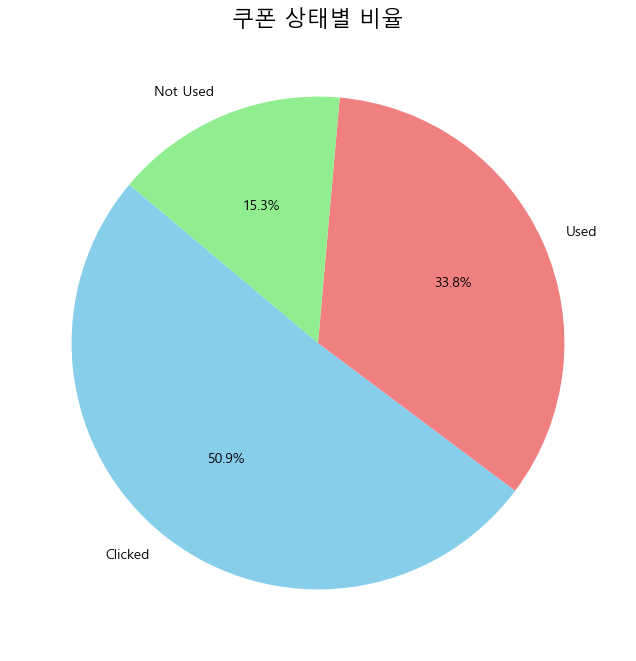

쿠폰 상태별 비율:
       쿠폰상태     건수         비율
0   Clicked  26926  50.876729
1      Used  17904  33.829643
2  Not Used   8094  15.293629


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 쿠폰 상태별 데이터 집계
coupon_usage = onlinesales_data['쿠폰상태'].value_counts().reset_index()
coupon_usage.columns = ['쿠폰상태', '건수']

# 총 비율 계산
coupon_usage['비율'] = (coupon_usage['건수'] / coupon_usage['건수'].sum()) * 100

# 원그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    coupon_usage['건수'],
    labels=coupon_usage['쿠폰상태'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgreen'],  # 색상 설정
    explode=[0.1 if status == 'used' else 0 for status in coupon_usage['쿠폰상태']]  # 'used'를 강조
)
plt.title("쿠폰 상태별 비율", fontsize=16)
plt.show()

# 데이터 출력
print("쿠폰 상태별 비율:")
print(coupon_usage)


## 요일별 구매 횟수

요일별 구매 횟수:
요일
월요일    4464
화요일    4611
수요일    8887
목요일    9000
금요일    9266
토요일    8177
일요일    8519
Name: count, dtype: int64


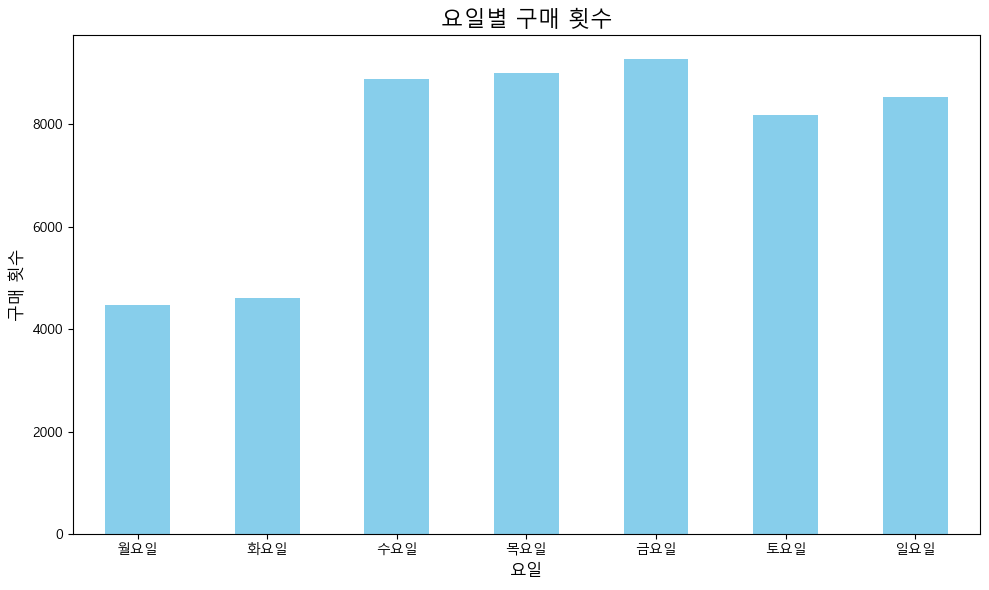

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 데이터 타입 변환
onlinesales_data['거래날짜'] = pd.to_datetime(onlinesales_data['거래날짜'])

# 요일별 구매 횟수 계산
onlinesales_data['요일'] = onlinesales_data['거래날짜'].dt.day_name(locale='ko_KR')  # 한글 요일
weekday_counts = onlinesales_data['요일'].value_counts().reindex(
    ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], fill_value=0
)

# 결과 출력
print("요일별 구매 횟수:")
print(weekday_counts)

# 시각화: 막대그래프
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('요일별 구매 횟수', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('구매 횟수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 코호트 분석

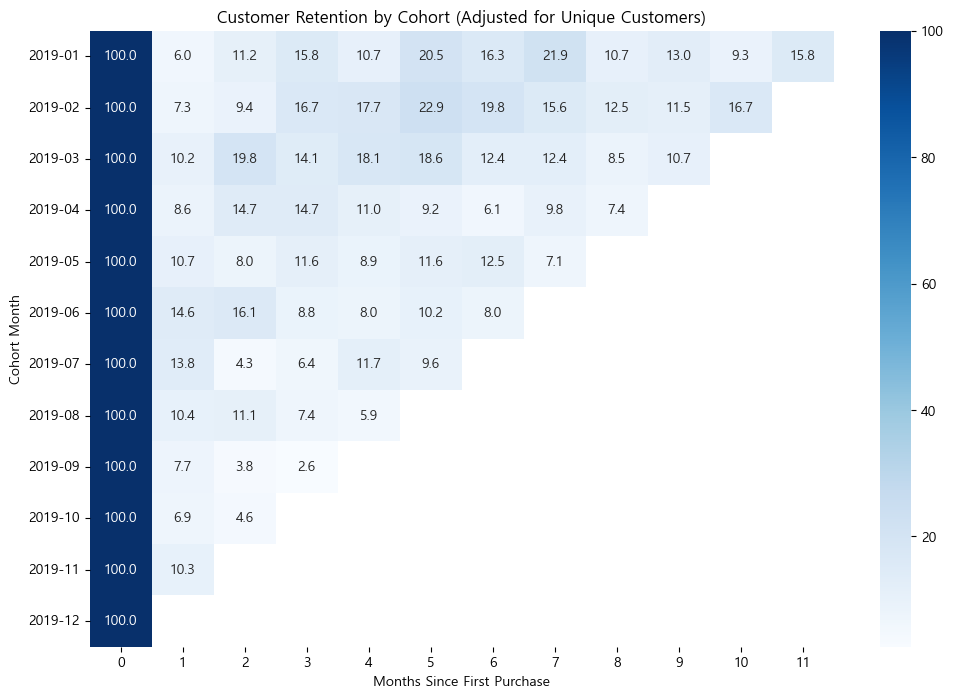

In [14]:
# 거래 데이터 불러오기 및 기본 전처리
onlinesales_data['거래날짜'] = pd.to_datetime(onlinesales_data['거래날짜'])
onlinesales_data['CohortMonth'] = onlinesales_data['거래날짜'].dt.to_period('M')  # Cohort 기준 월
onlinesales_data['FirstPurchaseMonth'] = onlinesales_data.groupby('고객ID')['거래날짜'].transform('min').dt.to_period('M')  # 첫 구매 월

# Cohort Index (개월 차) 계산
onlinesales_data['CohortIndex'] = (onlinesales_data['CohortMonth'] - onlinesales_data['FirstPurchaseMonth']).apply(lambda x: x.n)

# 중복 제거: 고객 단위로 특정 CohortIndex 당 한 번만 카운트
unique_customers = onlinesales_data.drop_duplicates(subset=['고객ID', 'CohortIndex'])

# Cohort별 고객 수 계산
cohort_data = unique_customers.groupby(['FirstPurchaseMonth', 'CohortIndex'])['고객ID'].nunique().reset_index()

# Cohort 데이터를 피벗 테이블 형태로 변환
cohort_pivot = cohort_data.pivot(index='FirstPurchaseMonth', columns='CohortIndex', values='고객ID')

# 첫 달 기준 고객 수 (분모)
cohort_size = cohort_pivot.iloc[:, 0]

# 리텐션 비율 계산
retention_rate = cohort_pivot.divide(cohort_size, axis=0) * 100

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".1f", cmap="Blues")
plt.title("Customer Retention by Cohort (Adjusted for Unique Customers)")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")
plt.show()

## 파레토 분석

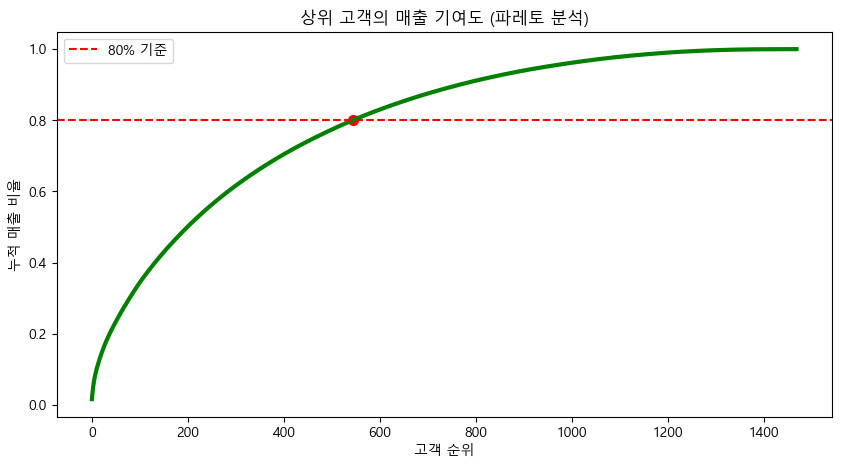

80% 매출을 차지하는 고객 수: 543


In [25]:
# 매출 계산 (수량 * 평균금액)
onlinesales_data['매출'] = onlinesales_data['수량'] * onlinesales_data['평균금액']

# 고객별 총 매출 계산
customer_sales = onlinesales_data.groupby('고객ID')['매출'].sum().reset_index()

# 매출 순으로 정렬
customer_sales = customer_sales.sort_values(by='매출', ascending=False)

# 누적 매출 비율 계산
customer_sales['누적매출비율'] = customer_sales['매출'].cumsum() / customer_sales['매출'].sum()

# 80%에 해당하는 고객 수 찾기
top_customers = customer_sales[customer_sales['누적매출비율'] <= 0.8]
num_top_customers = len(top_customers)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(len(customer_sales)), customer_sales['누적매출비율'], color='green', linewidth=3)
plt.axhline(y=0.8, color='red', linestyle='dashed', label='80% 기준')

# 80% 달성한 지점 강조
plt.scatter(num_top_customers, customer_sales.iloc[num_top_customers]['누적매출비율'], color='red', s=50)

# 라벨 추가
plt.xlabel("고객 순위")
plt.ylabel("누적 매출 비율")
plt.title("상위 고객의 매출 기여도 (파레토 분석)")
plt.legend()

# 그래프 출력
plt.show()

# 80%의 매출을 차지하는 고객 수 출력
print(f"80% 매출을 차지하는 고객 수: {num_top_customers}")
